## Random_Forest-Classification

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

### Dataset loading

In [2]:
#read csv dataset
df=pd.read_csv("D:\\heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Exploratory Data Analysis(EDA) perform

In [3]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#check null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#check duplicate value
df.duplicated().sum()

np.int64(0)

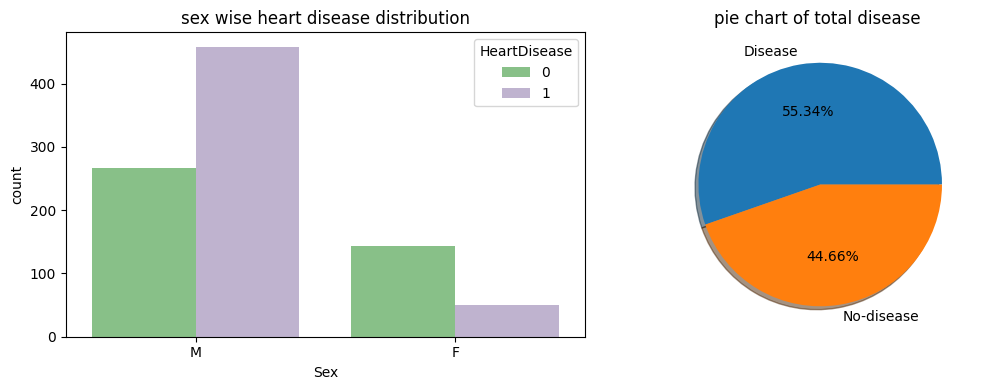

In [6]:
#count plot 
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.countplot(df,x='Sex',hue='HeartDisease',ax=axes[0],palette='Accent')
axes[0].set_title("sex wise heart disease distribution")
#pie plot
values=df.HeartDisease.value_counts()
axes[1].pie(values,labels=['Disease','No-disease'],autopct='%1.2f%%',shadow=True)
axes[1].set_title("pie chart of total disease ")
plt.tight_layout()
plt.show()


### Feature Engineering

In [7]:
#perform One-hot-encoding
col=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encode_df=pd.get_dummies(df,columns=col,drop_first=True,dtype=np.int64)

In [8]:
encode_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


### Train test split

In [9]:
#define independent and target variable
x=encode_df.drop('HeartDisease',axis=1)
y=df.HeartDisease   

In [10]:
#Train test split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### Model building and Hyperparameter Tuning

In [11]:
params={'n_estimators':[50,100,150],'max_depth':[None,5,10],'max_features':['sqrt','log2'],'criterion':['gini','entropy']}
model=RandomForestClassifier()
gcv=GridSearchCV(estimator=model,param_grid=params,n_jobs=-1,scoring='accuracy')
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [12]:
#see the best parameters
print("best parameters:",gcv.best_params_)

best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [13]:
best_model=gcv.best_estimator_

# Model Evaluation

In [14]:
y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy score={accuracy*100:.2f}%")

Accuracy score=86.96%


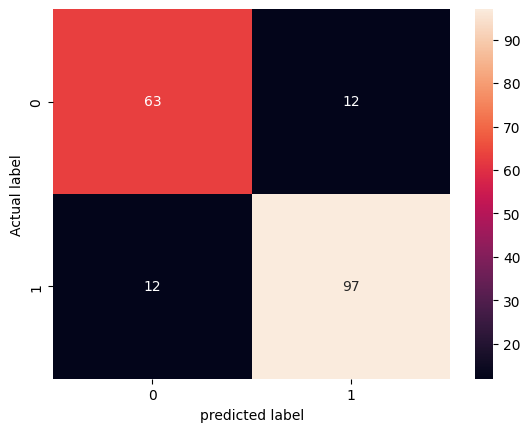

In [15]:
#plot confusion matrix
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion,annot=True)
plt.xlabel("predicted label")
plt.ylabel("Actual label")
plt.show()

In [16]:
#see classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        75
           1       0.89      0.89      0.89       109

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



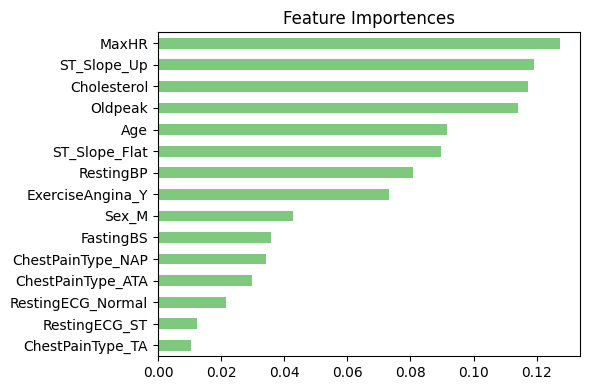

In [17]:
#see the most importent features
features=pd.Series(best_model.feature_importances_,index=x.columns).sort_values()
features.plot(kind='barh',title='Feature Importences',figsize=(6,4),cmap='Accent')
plt.tight_layout()
plt.show()

### Save the Model

In [21]:
#save in joblib file
joblib.dump(best_model,'random_forest_model.joblib')

['random_forest_model.joblib']